# Recommender System Using MovieLens DataSet
## https://grouplens.org/datasets/movielens/
## 1. Cleaning DataSet

Checking data

In [2]:
import pandas as pd
df = pd.read_csv('~/Data/MovieLens/ratings.csv') # load rating file
df.head(10)

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
5,1,112,3.5,1094785740
6,1,151,4.0,1094785734
7,1,223,4.0,1112485573
8,1,253,4.0,1112484940
9,1,260,4.0,1112484826


In [3]:
df.index.values # checking index 

array([       0,        1,        2, ..., 20000260, 20000261, 20000262])

In [4]:
# Drop unwanted columns
# Removing timestamp
df.drop("timestamp", inplace=True, axis=1)
df.head(5)

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [5]:
# Fill NaN with ' '
#df['col'] = df['col'].fillna(' ')

# Fill NaN with 99
#df['col'] = df['col'].fillna(99)

# Fill NaN with the mean of the column
#df['rating'] = df['rating'].fillna(df['rating'].mean())

# Drop all rows with Nan
#df.dropna()

df['rating'] = df['rating'].interpolate()  # Fill NaN using Linear Interpolation for ratings

df.dropna() # Drop rows with Nan left as it's useless data without userId or MovieId


,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
5,1,112,3.5
6,1,151,4.0
7,1,223,4.0
8,1,253,4.0
9,1,260,4.0


# 2. How are the ratings distributed

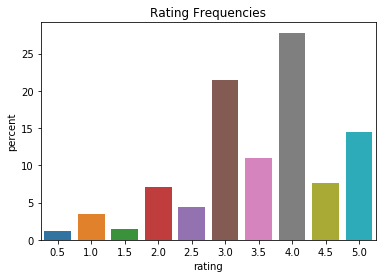

In [7]:
# Ratings with respect to Percentage of movies
import matplotlib.pyplot as plt
import seaborn as sns

norm_counts = (
    df['rating']
    .value_counts(normalize=True, sort=False)
    .multiply(100)
    .reset_index()
    .rename(columns={'rating': 'percent', 'index': 'rating'})
)
ax = sns.barplot(x='rating', y='percent', data=norm_counts)
ax.set_title('Rating Frequencies')
plt.show()

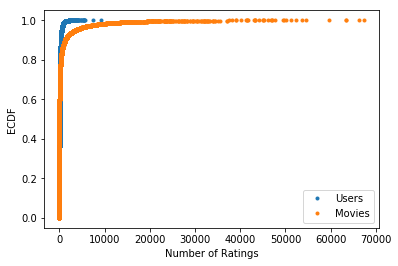

In [11]:
import numpy as np

# ECDF plot
# An ECDF plot has an advantage compared to a histogram that all data points can be plotted in a meaningful way, 
# and no bin size has to be chosen to average arbitrary chunks of it.

user_counts = df['userId'].value_counts(ascending=True)
user_counts.index = np.arange(len(user_counts)) / len(user_counts)
plt.plot(user_counts, user_counts.index, '.', label='Users')
movie_counts = df['movieId'].value_counts(ascending=True)
movie_counts.index = np.arange(len(movie_counts)) / len(movie_counts)
plt.plot(movie_counts, movie_counts.index, '.', label='Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('ECDF')
plt.legend()
plt.show()